# Homework Lecture 19:

Highly nonlinear oscillator:

Recall the numerical solution for oscillations of a spring with power p = 12 (use F=-0.01*y[0]**11). Decompose the solution into a Fourier series and determine the number of higher harmonics that contribute at least 10%; for example, determine the n for which |bn /b1 | < 0.1. Check that resuming the components reproduces the signal. (Landau 289)

Warning: please only sample the data within one period

Landau, Rubin H., Manuel Páez, Cristian Bordeianu. Computational Physics: Problem Solving with Python, 3rd Edition. Wiley-Blackwell, 2015-07-15. VitalBook file.


## Nonlinear Oscillator

To solve it with RK method
\begin{equation}
\frac{dx}{dt}=v\\
\frac{dv}{dt}=F
\end{equation}

the y vector is {x,v}, the force vector is {v,F}, so $d{\bf y}/dt={\bf F}$

\begin{equation}
F = -0.01 x^{11}
\end{equation}

where

\begin{equation}
k =0.01\\
y[0] = x^{11}
\end{equation}

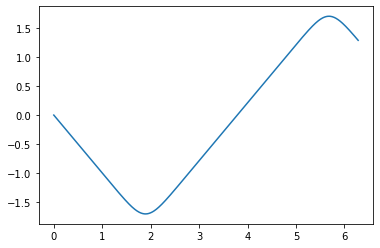

In [1]:
import numpy as np
from cmath import *
import matplotlib.pyplot as plt
    
    
#   Initialization
a = 0.
b = 6.2832
n = 1000      
K = 0.01
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;   y[1] = -1.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):
    '''
    force function for nonlinear oscillator
    '''
    fReturn[0] =y[1]                                      
    fReturn[1] =-K*y[0]**11 
    return fReturn

def rk4(t,h,n):   
    '''
    function for Runge-Kutta integration
    '''
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                             
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              
    if ((t + h) > b):
        h = b - t                                           
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
    
plt.plot(xp,yp)
plt.show()

### Fourier Series

\begin{equation}
a_n = \frac{2}{T} \int^T_0 dt cos(n \omega t) y(x)\\
b_n = \frac{2}{T} \int^T_0 dt sin(n \omega t) y(x)
\end{equation}

Our function is odd, therefore $a_n=0$.

\begin{equation}
y(t) = \frac{a_o}{2} + \Sigma^{\inf}_{n=1} (a_n cos(n \omega t) + b_n sin(n \omega t))\\
= \frac{2}{\pi} (sin(\omega t) - \frac{1}{2} sin (2 \omega t) + \frac{1}{3} sin (3 \omega t) +...)
\end{equation}


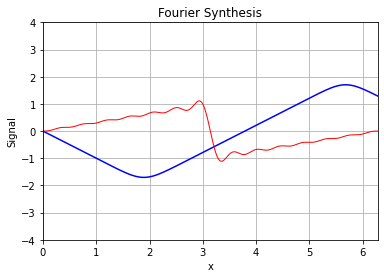

Fourier series with 15 harmonics


In [2]:
from pylab import *

Harmonics = 15
T = 2*pi                                                                 
s = 0.           
plot(xp,yp,color='b')           

def Fourier(Harmonics,T,xp):
    '''
    function to decompose force into Fourier series
    using specified number of harmonics
    '''
    sumy = 0                                            
    om = 2.*pi/T                                    
    fac = 1
    for m in range(1,Harmonics):         
        fac = 1./m*(-1.)**(m+1) 
        '''
        I cannot determine the proper factor, everytime I calculate
        it, this is what I get and it is obviously not the right series
        '''
        sumy += fac* sin(m*om*xp)                       
    sumy = (2./pi)*sumy                      
    return sumy

series = Fourier(Harmonics,T,xp)                                 
l, = plt.plot(xp,series,lw=1, color='red')

plt.axis([0, 2*pi, -4.0, 4.0])            
xlabel('x')                                        
ylabel('Signal')                                      
title('Fourier Synthesis')
grid(True)               

plt.show()
print('Fourier series with', Harmonics, 'harmonics')

### Discrete Fourier Transform

\begin{equation}
y(x) = -kx^{11}\\
y_k = y(x_k)\\
Y(\omega_n) = h \Sigma^N_{k=1} y_k \frac{e ^{\frac{-in2\pi k}{N}}}{\sqrt{2\pi}}
\end{equation}

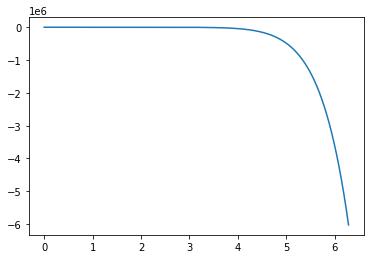

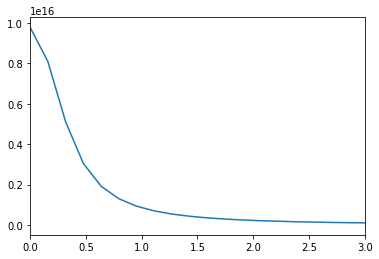

In [3]:
N = 500;                  Np = N                           
signal = np.zeros( (N+1), float )     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = np.zeros( (Np), complex )               
xa = np.zeros( (N+1), float )   
nplot = np.zeros( N, float )   
fplot = np.zeros( N, float ) 

step = 2.*pi/N

def F(signal):
    '''
    function for the signal
    y(xk) = yk
    '''
    x = 0. 
    for i in range(0, N+1):
        signal[i] = -K*x**11
        xa[i] = x                   
        x += step
        
      
def fourier(dftz):       
    '''
    function to do discrete Fourier transform
    '''
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           
          zsum += signal[k]*exp(-zexpo)           
      dftz[n] = zsum * sq2pi      
      nplot[n] = n/N/step
      fplot[n] = dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real
    return dftz
    

F(signal);       
fun=fourier(dftz)              
plt.plot(xa,signal)
plt.show()
plt.plot(nplot,fplot)
plt.xlim([0.,3.])
plt.show()

### Reconstruction

\begin{equation}
y(x_k) = \Sigma^N_{n=11} \frac{\sqrt{2\pi}}{N} e^{\frac{in2\pi k}{N}} Y(\omega_n)
\end{equation}

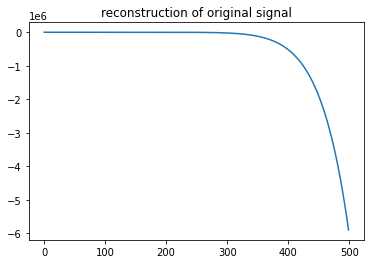

In [4]:
#I could not figure out how to reconstruct the signal,
#I used this code from last semester when we leanred about fft
#in Phys 300

def reconstruct(c):
    '''
    This is a code to do inverse Fourier transform and bring back our old signal
    '''
    N = len(c)
    y = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            y[k] += (sqrt(2*pi)/N)*c[n]*exp(2j*pi*k*n/N)
    return y
#Call the old dft function in reconstruct function to regain the signal
r=reconstruct(fun).real
plt.plot(r)
plt.title('reconstruction of original signal')
plt.show()